# SPARK hackfest-in-a-box for TELCO - LAB 1

The objetive is this lab is to perform exploratory data analysis and data preparation on a customer churn telco dataset 

## 1 Exploratory data analysis

In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

In [2]:
import sys
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from datetime import datetime
import random

In [3]:
# Pre-defined input variables
print('....Setting input variables')
projectNbr = "YOUR_PROJECT_NBR"
projectID = "YOUR_PROJECT_ID"
appBaseName = "customer-churn-model"
appNameSuffix = "preprocessing"
appName = f"{appBaseName}-{appNameSuffix}"
sourceBucketUri = f"gs://s8s_data_bucket-{projectNbr}/telco_customer_churn_train_data.csv"

....Defining input variables


In [4]:
# SPARK session creation
print('....Initializing spark & spark configs')
spark = SparkSession.builder.appName(appName).getOrCreate()

....Initializing spark & spark configs


In [5]:
# Data loading
print('....Read source data')
rawChurnDF = spark.read.options(inferSchema = True, header= True).csv(sourceBucketUri)

....Read source data


In [6]:
# Show table schema
rawChurnDF.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



#### Q - What do you think about the infered data types on the previous cell?
* Show a couple of rows from the table using the `show` function
* Count the number of rows using the `count` function

In [7]:
# _______INSERT_CODE_HERE_______
print(rawChurnDF.count())
rawChurnDF.show(2,vertical=True)

7043
-RECORD 0----------------------------
 customerID       | 7590-VHVEG       
 gender           | Female           
 SeniorCitizen    | 0                
 Partner          | Yes              
 Dependents       | No               
 tenure           | 1                
 PhoneService     | No               
 MultipleLines    | No phone service 
 InternetService  | DSL              
 OnlineSecurity   | No               
 OnlineBackup     | Yes              
 DeviceProtection | No               
 TechSupport      | No               
 StreamingTV      | No               
 StreamingMovies  | No               
 Contract         | Month-to-month   
 PaperlessBilling | Yes              
 PaymentMethod    | Electronic check 
 MonthlyCharges   | 29.85            
 TotalCharges     | 29.85            
 Churn            | No               
-RECORD 1----------------------------
 customerID       | 5575-GNVDE       
 gender           | Male             
 SeniorCitizen    | 0                
 Partne

#### Q - Compute the per row distribution statistics, what business insights can you get?
* Use the `describe` function

In [9]:
# _______INSERT_CODE_HERE_______
rawChurnDF.describe().show(vertical=True)

[Stage 7:>                                                          (0 + 1) / 1]

-RECORD 0--------------------------------
 summary          | count                
 customerID       | 7043                 
 gender           | 7043                 
 SeniorCitizen    | 7043                 
 Partner          | 7043                 
 Dependents       | 7043                 
 tenure           | 7043                 
 PhoneService     | 7043                 
 MultipleLines    | 7043                 
 InternetService  | 7043                 
 OnlineSecurity   | 7043                 
 OnlineBackup     | 7043                 
 DeviceProtection | 7043                 
 TechSupport      | 7043                 
 StreamingTV      | 7043                 
 StreamingMovies  | 7043                 
 Contract         | 7043                 
 PaperlessBilling | 7043                 
 PaymentMethod    | 7043                 
 MonthlyCharges   | 7043                 
 TotalCharges     | 7043                 
 Churn            | 7043                 
-RECORD 1-------------------------

#### Q - Clean the data, for each column, look for how many rows have None, NULLs, or `' '` values
* Using `pyspark.sql.functions` 
* Using `spark.sql` 

In [10]:
#INSERT CODE
rawChurnDF.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            (col(c) == ' ')  | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in rawChurnDF.columns]).show(vertical=True)

[Stage 9:>                                                          (0 + 1) / 1]

-RECORD 0---------------
 customerID       | 0   
 gender           | 0   
 SeniorCitizen    | 0   
 Partner          | 0   
 Dependents       | 0   
 tenure           | 0   
 PhoneService     | 0   
 MultipleLines    | 0   
 InternetService  | 0   
 OnlineSecurity   | 0   
 OnlineBackup     | 0   
 DeviceProtection | 0   
 TechSupport      | 0   
 StreamingTV      | 0   
 StreamingMovies  | 0   
 Contract         | 0   
 PaperlessBilling | 0   
 PaymentMethod    | 0   
 MonthlyCharges   | 0   
 TotalCharges     | 11  
 Churn            | 0   



In [12]:
#INSERT CODE, use sql functions to find nulls, emptys, NULLS,NanS ..
rawChurnDF.createOrReplaceTempView("base_customer_churn")
for c in rawChurnDF.columns:
    print('Column: {}'.format(c))
    spark.sql("select count(*) from base_customer_churn where {} is null or {}=' ' or {} ='' or {} ='NULL'".format(c,c,c,c)).show()

Column: customerID
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: gender
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: SeniorCitizen
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: Partner
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: Dependents
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: tenure
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: PhoneService
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: MultipleLines
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: InternetService
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: OnlineSecurity
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: OnlineBackup
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: DeviceProtection
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: TechSupport
+--------+
|count(1)|
+--------+
|       0|
+--------+

Column: St

#### Q - Try to identify which columns have categorical values
* Using `countDistinc` from `pyspark.sql.functions` 
* Using `spark.sql` 

In [13]:
#INSERT CODE
rawChurnDF.select([countDistinct(c) for c in rawChurnDF.columns]).show(vertical=True)

[Stage 96:=======================================>              (146 + 5) / 200]

-RECORD 0--------------------------------
 count(DISTINCT customerID)       | 7043 
 count(DISTINCT gender)           | 2    
 count(DISTINCT SeniorCitizen)    | 2    
 count(DISTINCT Partner)          | 2    
 count(DISTINCT Dependents)       | 2    
 count(DISTINCT tenure)           | 73   
 count(DISTINCT PhoneService)     | 2    
 count(DISTINCT MultipleLines)    | 3    
 count(DISTINCT InternetService)  | 3    
 count(DISTINCT OnlineSecurity)   | 3    
 count(DISTINCT OnlineBackup)     | 3    
 count(DISTINCT DeviceProtection) | 3    
 count(DISTINCT TechSupport)      | 3    
 count(DISTINCT StreamingTV)      | 3    
 count(DISTINCT StreamingMovies)  | 3    
 count(DISTINCT Contract)         | 3    
 count(DISTINCT PaperlessBilling) | 2    
 count(DISTINCT PaymentMethod)    | 4    
 count(DISTINCT MonthlyCharges)   | 1585 
 count(DISTINCT TotalCharges)     | 6531 
 count(DISTINCT Churn)            | 2    



#### Q - Draw histograms to understand continous variables dsitributions, , what business insights can you get?
* Transform results from `spark.sql` to pandas using `toPandas()` function 
* Draw histogra using `hist()` 

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>]], dtype=object)

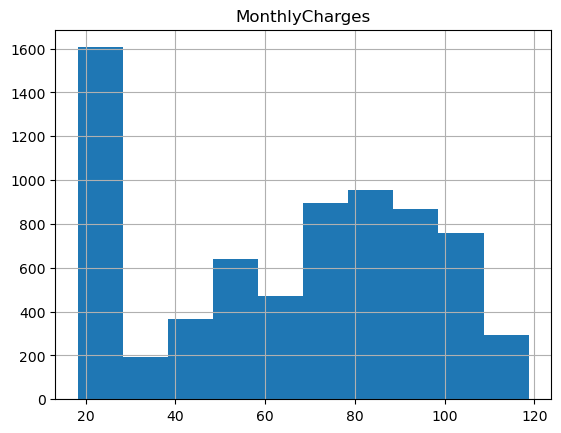

In [14]:
#INSERT CODE
MonthlyChargesPDF = spark.sql("SELECT MonthlyCharges from base_customer_churn").toPandas()
MonthlyChargesPDF.hist()

## 2 Data preprocessing

Data preprocessing is the manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values (e.g., Income: −100), impossible data combinations (e.g., Sex: Male, Pregnant: Yes), and missing values, etc.

#### Q - List data preprocessing steps
* Based on the insights derived from the previous section, this the proposed list the preprocessing steps you will apply to the dataset:
    * Null,empty .. field replacement with `None` value
    * Drop rows with `None` values
    * Uniform values in rows (e.g. change No internet service or No phone service to No)
    * Bucketize the `tenure` field
    * Change field names to `snake_case` 

#### Q - Write a chain of data transformations serializing data at each step to ensure traceablity and debugging
* Generate the following chain of datataframes `nullsReplacedDF`, `nullDroppedDF`,`partiallyProcessedDF`, `modelTrainingReadyDF` and `persistDF`

In [17]:
#INSERT CODE
print('....Replacing null, empty values ... with None')
nullsReplacedDF=rawChurnDF.select([when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            (col(c) == ' ')  | \
                            col(c).isNull() | \
                            isnan(c),None).otherwise(col(c)).alias(c) for c in rawChurnDF.columns])

11

In [26]:
#INSERT CODE
print('....Number of rows before dropping None values')
print(nullsReplacedDF.count())
print('....Dropping None values')
nullDroppedDF = nullsReplacedDF.na.drop()
print('....Number of rows after dropping None values')
print(nullDroppedDF.count())

....Number of rows before dropping None values
7043
....Dropping None values
....Number of rows after dropping None values


[Stage 119:>                                                        (0 + 1) / 1]

7032


In [27]:
print('....Homogenization of categorical values')
partiallyProcessedDF = nullDroppedDF.select([when( (col(c) == "No internet service") | (col(c) == "No phone service") , "No").otherwise(col(c)).alias(c) for c in nullDroppedDF.columns])

....Homogenization of categorical values


In [28]:
print('....Bucketizing the tenure field')
partiallyProcessedDF.createOrReplaceTempView("partially_transformed_customer_churn")
modelTrainingReadyDF = spark.sql("""
                                select  customerID 
                                        ,gender as Gender
                                        ,cast(SeniorCitizen as int) SeniorCitizen
                                        ,Partner
                                        ,Dependents
                                        ,cast(tenure as int)  Tenure
                                        ,case when (tenure<=12) then "Tenure_0-12"
                                              when (tenure>12 and tenure <=24) then "Tenure_12-24"
                                              when (tenure>24 and tenure <=48) then "Tenure_24-48"
                                              when (tenure>48 and tenure <=60) then "Tenure_48-60"
                                              when (tenure>60) then "Tenure_gt_60"
                                        end as Tenure_Group
                                        ,PhoneService
                                        ,MultipleLines
                                        ,InternetService
                                        ,OnlineSecurity
                                        ,OnlineBackup
                                        ,DeviceProtection
                                        ,TechSupport
                                        ,StreamingTV
                                        ,StreamingMovies
                                        ,Contract
                                        ,PaperlessBilling
                                        ,PaymentMethod
                                        ,cast(MonthlyCharges as float) MonthlyCharges
                                        ,cast(TotalCharges as float) TotalCharges
                                        ,lcase(Churn) as Churn
                                from partially_transformed_customer_churn  
                                """)

....Bucketizing the tenure field


In [29]:
print('....Format column names in snake_case for consistency')
persistDF = modelTrainingReadyDF.select("customerID", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "Tenure_Group", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges","Churn") \
                                .toDF("customer_id", "gender", "senior_citizen", "partner", "dependents", "tenure", "tenure_group", "phone_service", "multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies", "contract", "paperless_billing", "payment_method", "monthly_charges", "total_charges","churn") 

....Format column names in snake_case for consistency


In [31]:
print('....Save data in BigQuery for next steps')
bqDatasetNm = f"{projectID}.customer_churn_ds"
bigQueryTargetTableFQN = f"{bqDatasetNm}.training_data_notebook"
scratchBucketUri = f"s8s-spark-bucket-{projectNbr}/{appBaseName}/{appNameSuffix}"
spark.conf.set("parentProject", projectID)
spark.conf.set("temporaryGcsBucket", scratchBucketUri)

persistDF.write.format('bigquery') \
.mode("append")\
.option('table', bigQueryTargetTableFQN) \
.save()

....Save data in BigQuery for next steps


## 3 Extra ball
Once you have your data in BQ you can use this magic for a full fledge EdA
* `%bigquery_stats spark-hackfest-dev.customer_churn_ds.training_data`

**End of LAB 1**